<a href="https://colab.research.google.com/github/rahul-createui/machine_learning/blob/main/PCA%26LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  Student_ID       Name     Class  SSC_Marks  HSC_Marks  College_Marks  \
0      S1000  Student_0  Commerce        535        452            692   
1      S1001  Student_1  Commerce        494        535            551   
2      S1002  Student_2   Science        542        460            634   
3      S1003  Student_3   Science        441        483            686   
4      S1004  Student_4      Arts        427        544            569   

   Attendance_Percentage Grade  
0                  84.71     C  
1                  81.99     D  
2                  92.06     B  
3                  79.27     D  
4                  91.99    A+  


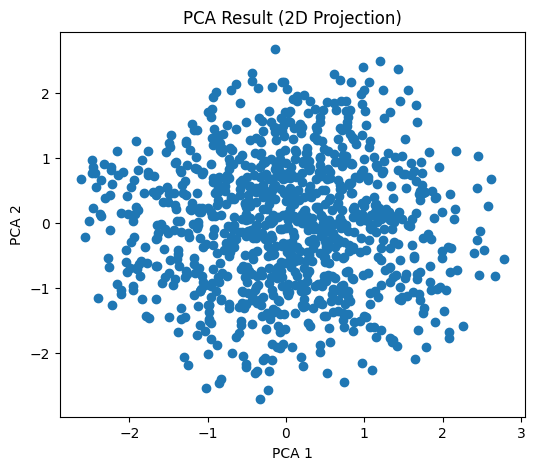

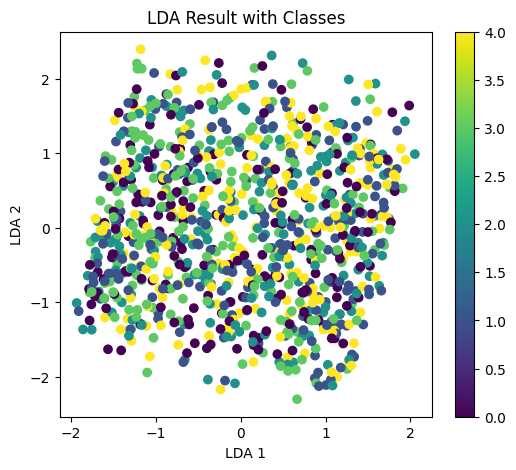

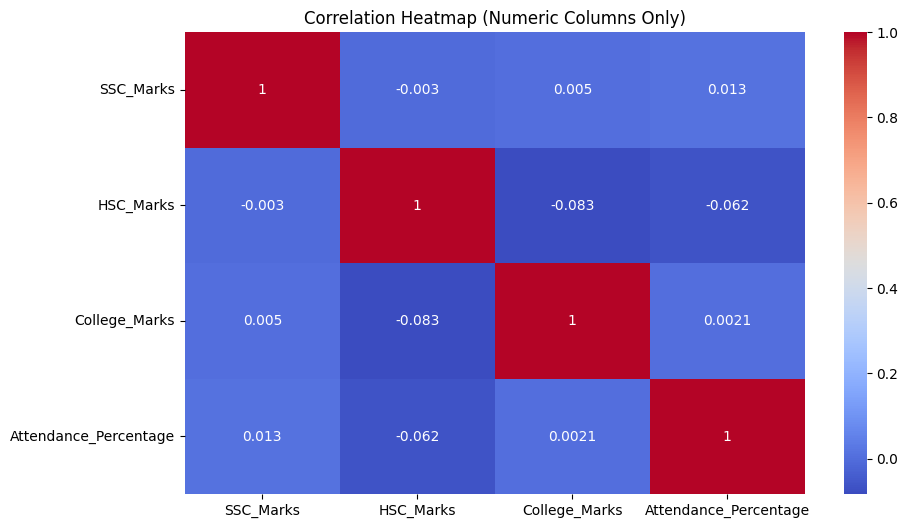

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import seaborn as sns

df = pd.read_csv("College_Marks_Dataset.csv")
print(df.head())

target_col = "Grade"

y = df[target_col]
X = df.drop(target_col, axis=1)

X = X.select_dtypes(include=['int64', 'float64'])

le = LabelEncoder()
y_encoded = le.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,5))
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("PCA Result (2D Projection)")
plt.show()

lda = LDA(n_components=2)
lda_result = lda.fit_transform(X_scaled, y_encoded)

plt.figure(figsize=(6,5))
plt.scatter(lda_result[:, 0], lda_result[:, 1], c=y_encoded)
plt.xlabel("LDA 1")
plt.ylabel("LDA 2")
plt.title("LDA Result with Classes")
plt.colorbar()
plt.show()

numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.show()
